In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn


In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin',
             'bmi', 'pedigree', 'age', 'label']

data = pd.read_csv('diabetes.csv', header=None, names=col_names)
print(data.shape)
data.head()


(769, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [4]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [5]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = data[feature_cols]
y = data.label


In [10]:
x = data[feature_cols].apply(pd.to_numeric, errors='coerce')

In [11]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(538, 7)

(538,)

(231, 7)

(231,)

In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)



In [16]:
model = SVC(kernel='rbf', random_state=0)
model.fit(x_train, y_train)

svc_prediction = model.predict(x_test)
print("svc_prediction:", svc_prediction)



svc_prediction: ['0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0'
 '1' '1' '0' '0' '1' '0' '1' '1' '0' '0' '1' '1' '0' '1' '1' '0' '1' '0'
 '0' '1' '0' '0' '1' '1' '0' '1' '0' '1' '1' '1' '0' '0' '0' '1' '1' '0'
 '1' '1' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0'
 '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '1' '1' '0'
 '1' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0'
 '1' '0' '0' '1' '1' '0' '0' '0' '0' '1' '0' '1' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '1'
 '0' '1' '0' '1' '1' '1' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '1'
 '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0'
 '0' '1' '0' '1' '1' '0' '1' '0' '0' '1' '0' '0' '0' '0' '1']


In [17]:
conf_mat=metrics.confusion_matrix(y_test,svc_prediction)
print('SVC[kernel - rbf ]')
print('confusion Matrix:\n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test,svc_prediction)
print('Accuracy Score:',Accuracy_score)
print('classification_report(svc_prediction,y_test)')

SVC[kernel - rbf ]
confusion Matrix:
 [[126  27]
 [ 27  51]]
Accuracy Score: 0.7662337662337663
classification_report(svc_prediction,y_test)


In [18]:
model=SVC(kernel='linear',random_state=0)
model.fit(x_train,y_train)
svc_prediction=model.predict(x_test)
print('svc_prediction:',svc_prediction)

svc_prediction: ['0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '0'
 '0' '1' '0' '0' '1' '0' '1' '1' '0' '0' '1' '0' '0' '1' '1' '0' '1' '0'
 '0' '1' '0' '0' '1' '1' '0' '0' '0' '1' '1' '1' '0' '0' '0' '1' '1' '0'
 '1' '1' '0' '1' '1' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0'
 '0' '0' '1' '0' '0' '0' '1' '0' '1' '0' '1' '1' '0' '0' '0' '0' '1' '0'
 '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0'
 '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0'
 '1' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '1' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '1' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1' '0'
 '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0'
 '0' '1' '0' '1' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1']


[Text(0.5, 1.0, 'SVC[rbf]')]

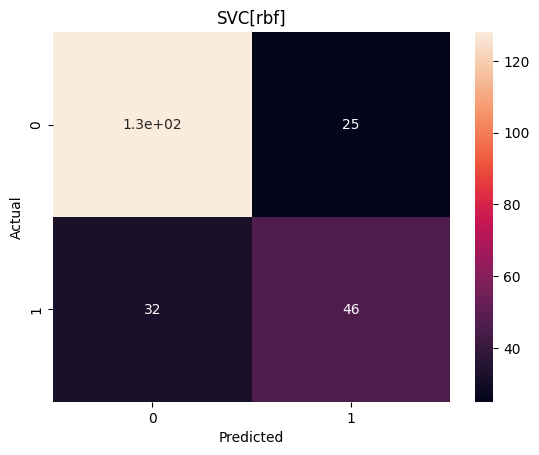

In [19]:
conf_mat=pd.crosstab(y_test, svc_prediction,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat,annot=True).set(title='SVC[rbf]')

In [20]:
conf_mat=metrics.confusion_matrix(y_test,svc_prediction)
print('SVC [kernel - linear]')
print('Confusion Matrix : \n', conf_mat)
Accuracy_score=metrics.accuracy_score(y_test, svc_prediction)
print('Accuracy Score: ' , Accuracy_score)
print('Accuracy in Percentage: ', int(Accuracy_score*100),'%')
print('Classification_report(svc_prediction,y_test)')

SVC [kernel - linear]
Confusion Matrix : 
 [[128  25]
 [ 32  46]]
Accuracy Score:  0.7532467532467533
Accuracy in Percentage:  75 %
Classification_report(svc_prediction,y_test)


[Text(0.5, 1.0, 'SVC[linear]')]

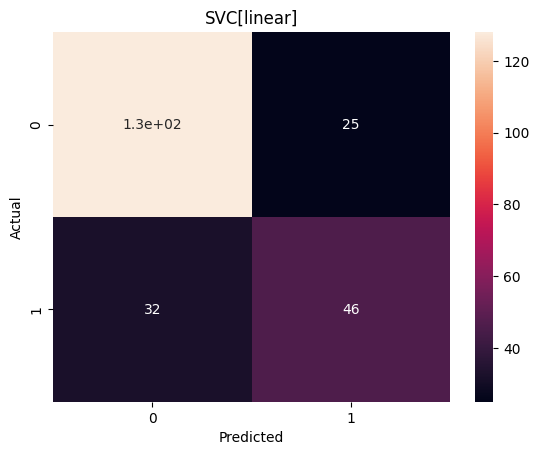

In [21]:
conf_mat=pd.crosstab(y_test,svc_prediction,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True).set(title='SVC[linear]')